In [1]:
import numpy as np
# odeint is one of the functions you can use for integration in Python
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
%matplotlib notebook

$PROBLEM$ $1$

$Part$ $A$

<IPython.core.display.Javascript object>


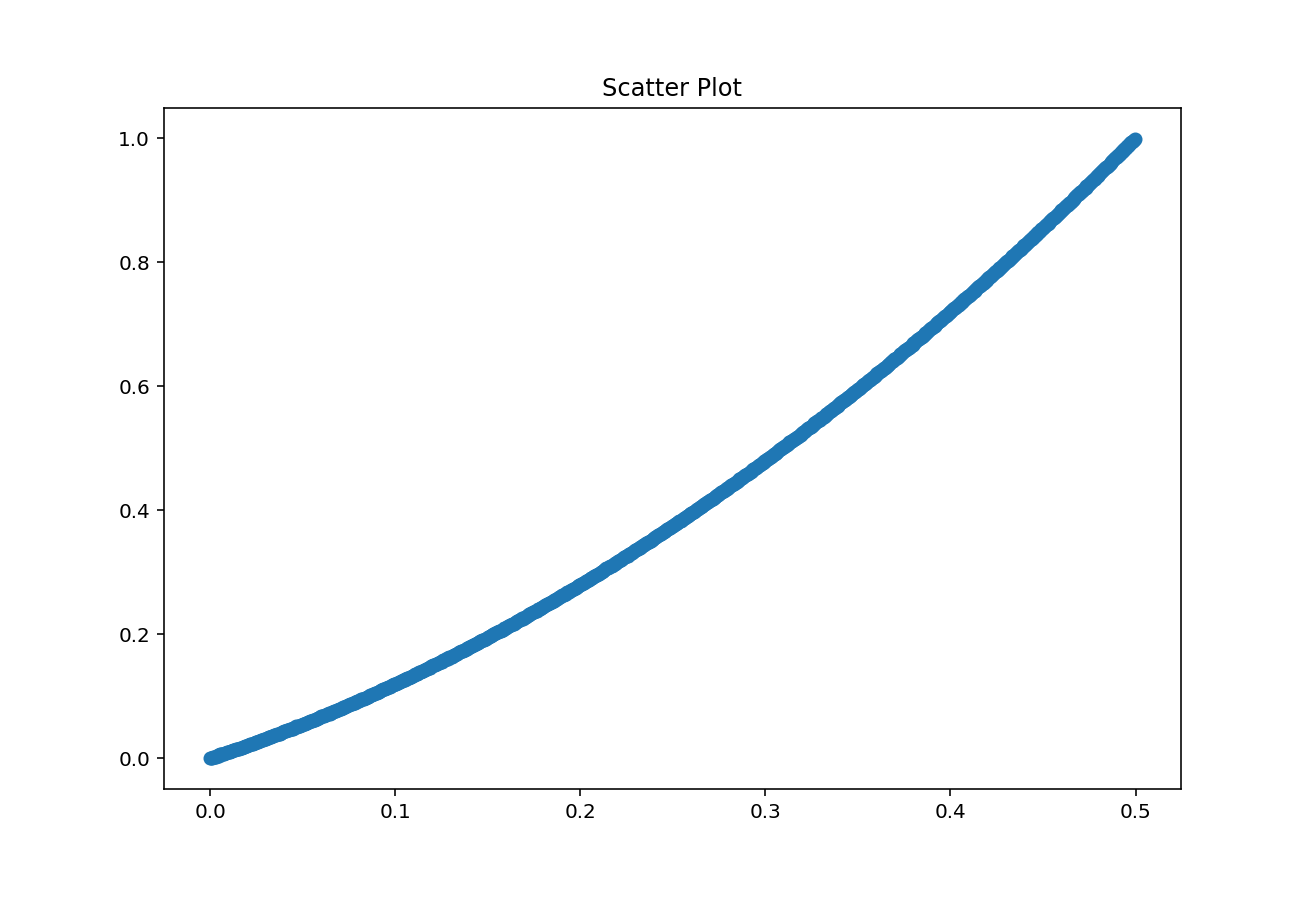

In [3]:
from scipy.io import loadmat
data = loadmat('data/dataHW6.mat')
x=data['x'].reshape((-1,1))
f=data['f'].reshape((-1,1))

plt.figure()
plt.scatter(x,f)
plt.title("Scatter Plot")
plt.show()


$Part$ $B$

<ipython-input-8-cdc560a76b09>:13: RuntimeWarning: divide by zero encountered in double_scalars
  F[i]=(f[i+1]-f[i-1])/(h*2)


<IPython.core.display.Javascript object>


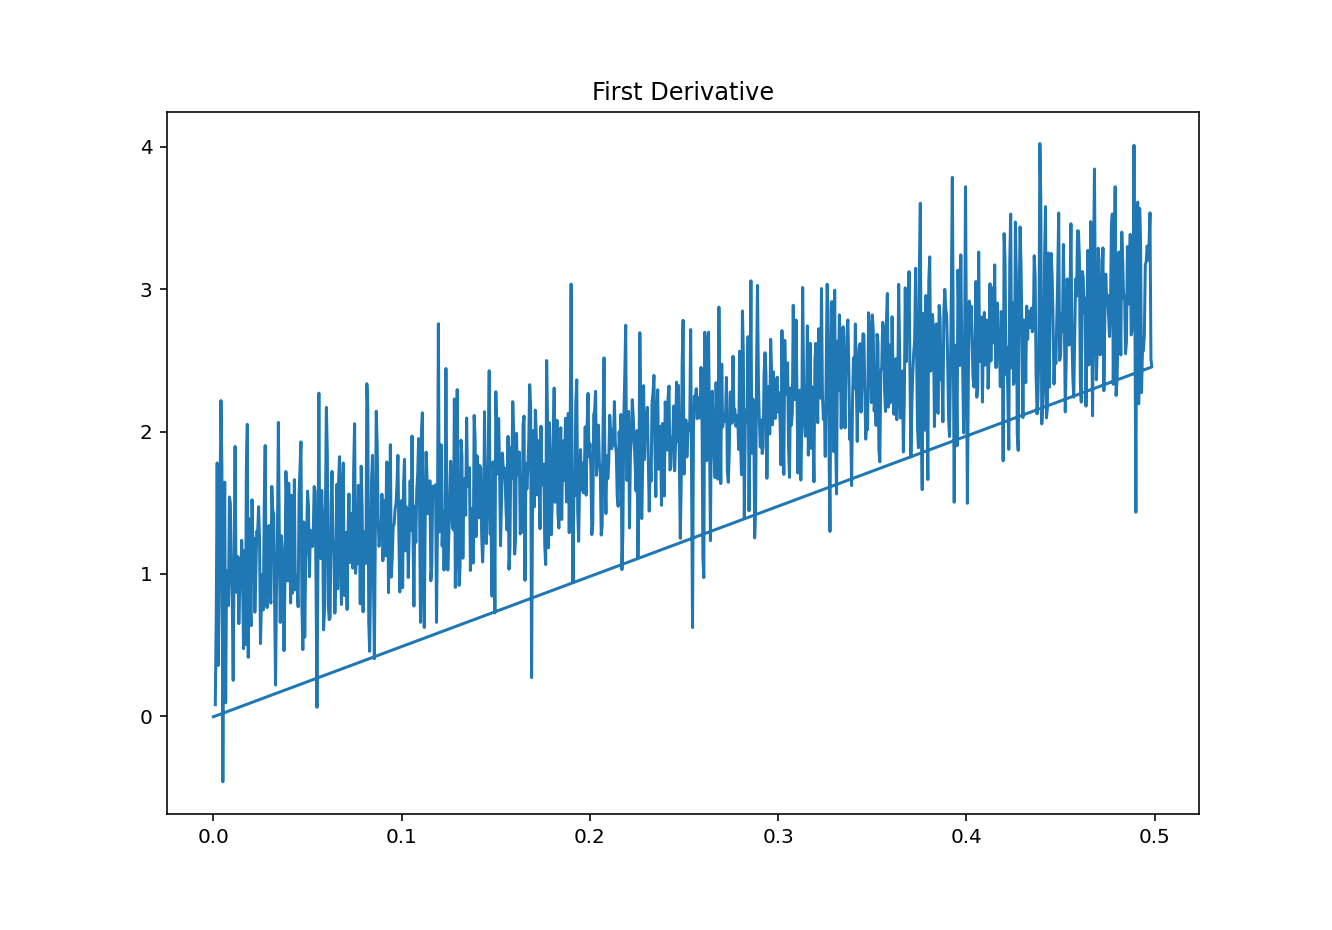

Text(0.5, 1.0, 'First Derivative')

In [8]:
from scipy.io import loadmat
data = loadmat('data/dataHW6.mat')
x=data['x'].reshape(data['x'].size)
f=data['f'].reshape(data['f'].size)

n=998
xnew=x[1:999]
xnew[0]=0
xnew[997]=0
F=np.zeros_like(f[1:999])
for i in range(n):
    h=x[i+1]-x[i]
    F[i]=(f[i+1]-f[i-1])/(h*2)

plt.show()
plt.figure()
plt.plot(xnew,F)
plt.title("First Derivative")

$Part$ $C$

<ipython-input-9-f142b2f7e49c>:4: RuntimeWarning: divide by zero encountered in double_scalars
  F[i]=(f[i+1]-2*f[i]+f[i-1])/(h**2)


<IPython.core.display.Javascript object>


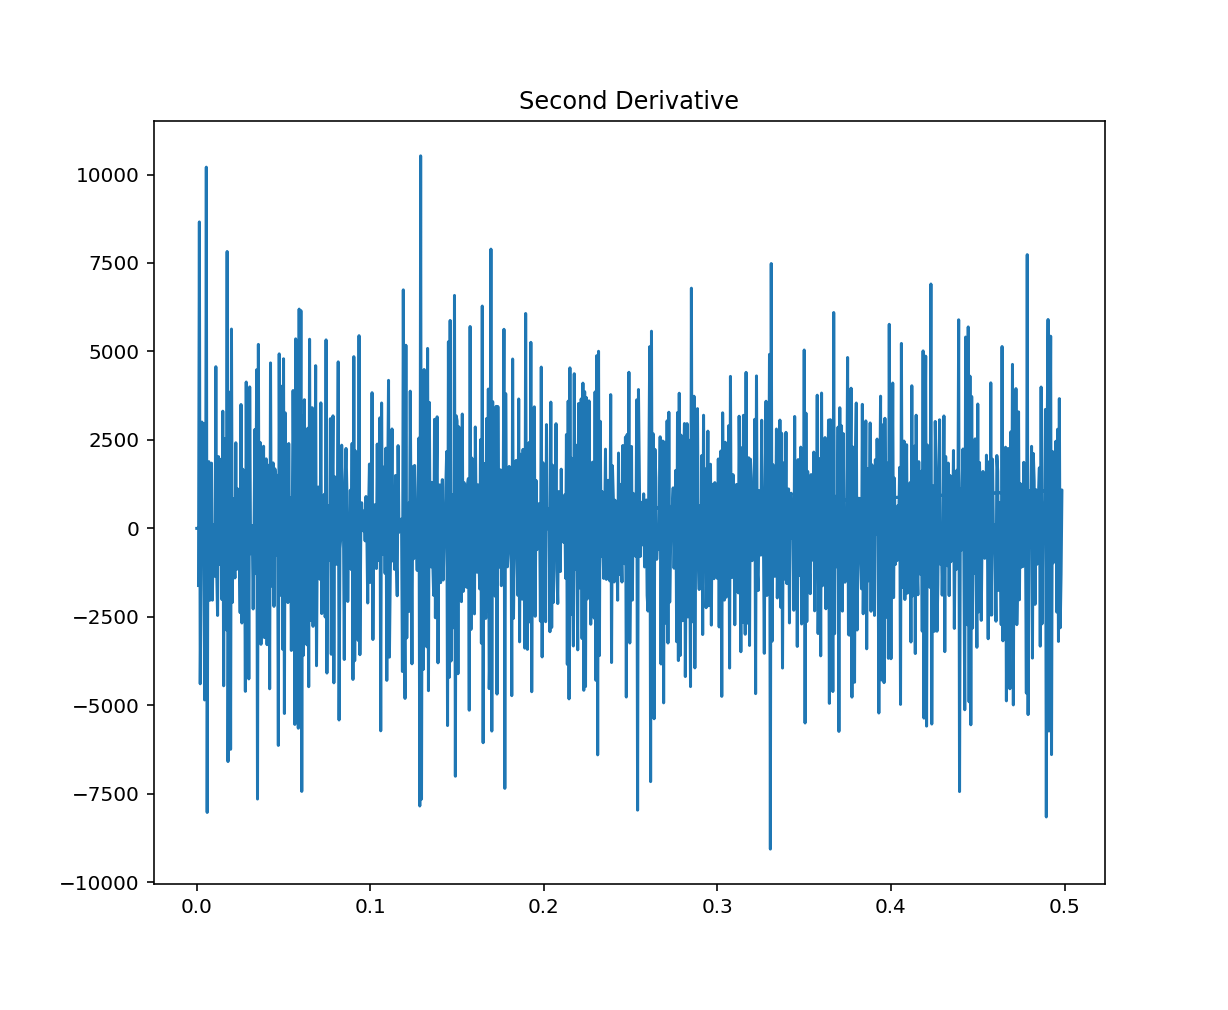

Text(0.5, 1.0, 'Second Derivative')

In [9]:
for i in range(n):
    
    h=x[i+1]-x[i]
    F[i]=(f[i+1]-2*f[i]+f[i-1])/(h**2)
xnew=x[1:999]
xnew[0]=0
xnew[997]=0
plt.figure()
plt.plot(xnew,F)
plt.title("Second Derivative")

$PROBLEM$ $2$

$Part$ $A$

<IPython.core.display.Javascript object>


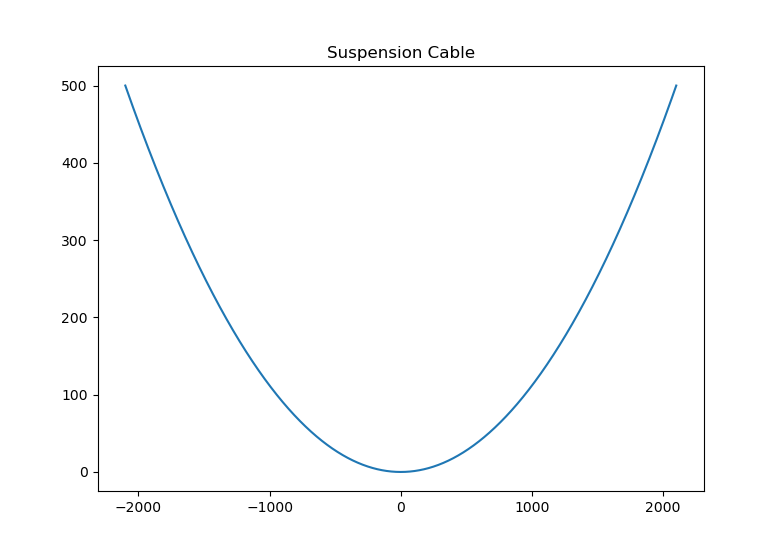

Text(0.5, 1.0, 'Suspension Cable')

In [199]:
C=4491
x=np.linspace(-2100,2100,2000)
y=C*((np.exp(x/C)+np.exp(-x/C))/2-1)
plt.figure()
plt.plot(x,y)
plt.title("Suspension Cable")


$Part$ $B$

In [118]:
dy_dx=0.5*(np.exp(x/C)-np.exp(-x/C))
temp=(1+dy_dx**2)**0.5
L=np.trapz(temp,x)
print("Length of cable is  =",L)

Length of cable is  = 4354.738170430677


$PROBLEM$ $3$

$Part$ $A$

In [184]:
z=np.linspace(0,24,500)
fz=160*z/(z+4)*np.exp(-z/8)
print("The total wind force is ",np.trapz(fz,z))

The total wind force is  632.9566437944467


$PROBLEM$ $4$

$Part$ $A$

In [170]:
#to solve this equation let's introduce a new variable z
#U is a vector such that y=U[0] and z=U[1]
#since we are going to use this from part a to f let's define two functions
#z=omega, y=theta 
g=9.8  #constatn gravity
L=g/(2*np.pi)**2  #given constatnt through parts a to f
t=np.linspace(0,2,2000) #time from 0 to 2 

def dy_dt(U,t):
    y,z=U[0],U[1]
    F=np.empty(2)
    F[0]=z
    F[1]=-g/L*np.sin(y)
    return F

def diff_solve(A,B):
    theta0=A
    omega0=B
    y0=[theta0,omega0]
    solution=odeint(dy_dt,y0,t)
    return solution

$Part$ $B$

Yes as we can see they're a good match


<IPython.core.display.Javascript object>


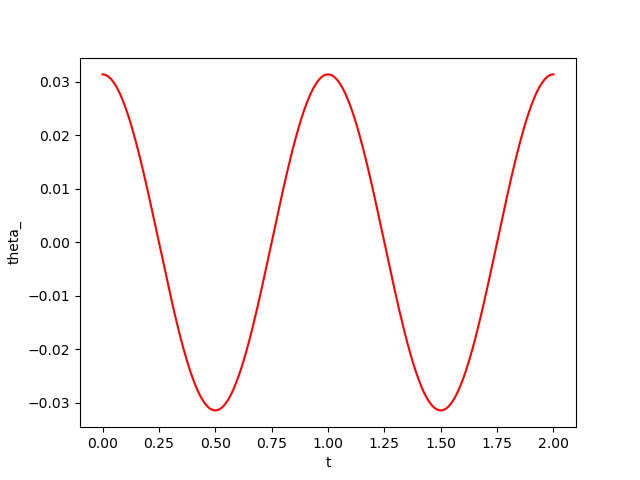

<IPython.core.display.Javascript object>


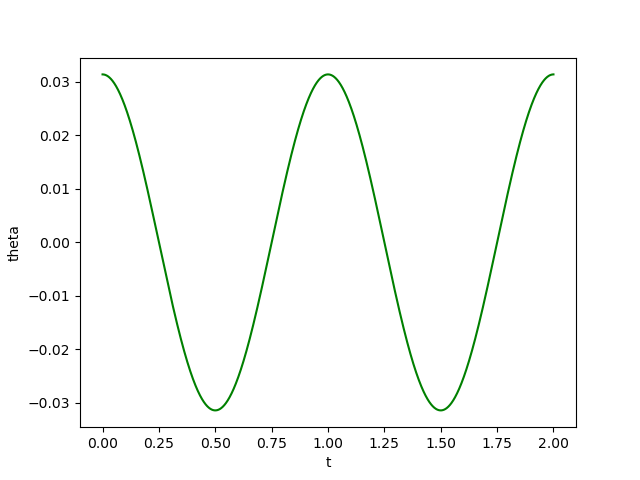

Text(0, 0.5, 'theta')

In [173]:
#given initial conditions A=pi/100 and B=0 and L=g/(2pi)^2
A,B=np.pi/100,0
solution=diff_solve(A,B)
theta=solution[:,0]
theta_=A*np.cos(np.sqrt(g/L)*t)
print("Yes as we can see they're a good match")
plt.figure()
plt.show()
plt.plot(t,theta_,'r')
plt.xlabel('t')
plt.ylabel('theta_')
plt.figure()
plt.plot(t,theta,'g')
plt.xlabel('t')
plt.ylabel('theta')

$Part$ $C$

Linearization is still okay, but it's starting to diverge at end


<IPython.core.display.Javascript object>


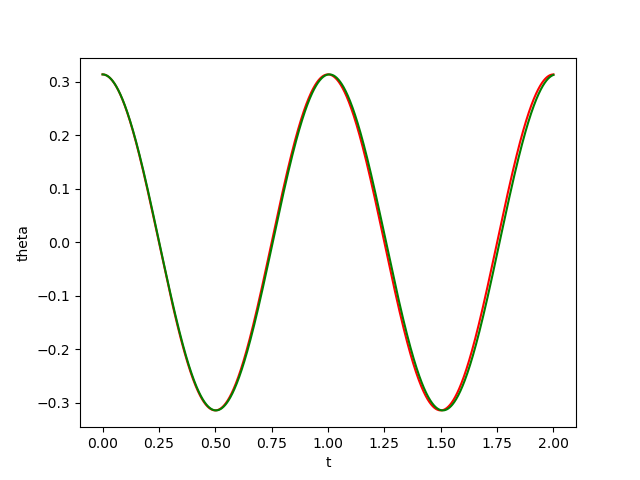

Text(0, 0.5, 'theta')

In [175]:
#given initial conditions A=pi/10 and B=0 and L=g/(2pi)^2
A,B=np.pi/10,0
solution=diff_solve(A,B)
theta=solution[:,0]
theta_=A*np.cos(np.sqrt(g/L)*t)
print("Linearization is still okay, but it's starting to diverge at end")
plt.figure()
plt.show()
plt.plot(t,theta_,'r')
plt.xlabel('t')
plt.ylabel('theta_')
plt.plot(t,theta,'g')

$Part$ $D$

No we can not say linearization applies, the graph diverges a lot


<IPython.core.display.Javascript object>


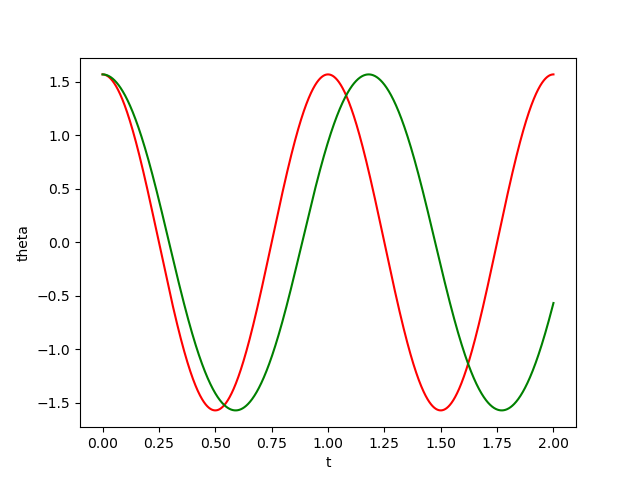

In [183]:
#given initial conditions A=pi/2 and B=0 and L=g/(2pi)^2
A,B=np.pi/2,0
solution=diff_solve(A,B)
theta=solution[:,0]
theta_=A*np.cos(np.sqrt(g/L)*t)
print("No we can not say linearization applies, the graph diverges a lot")
plt.figure()
plt.show()
plt.plot(t,theta_,'r')
plt.xlabel('t')
plt.ylabel('theta')
plt.plot(t,theta,'g')

$Part$ $E$

For intitial angle pi, pendulum is stuck at the same constant height


<IPython.core.display.Javascript object>


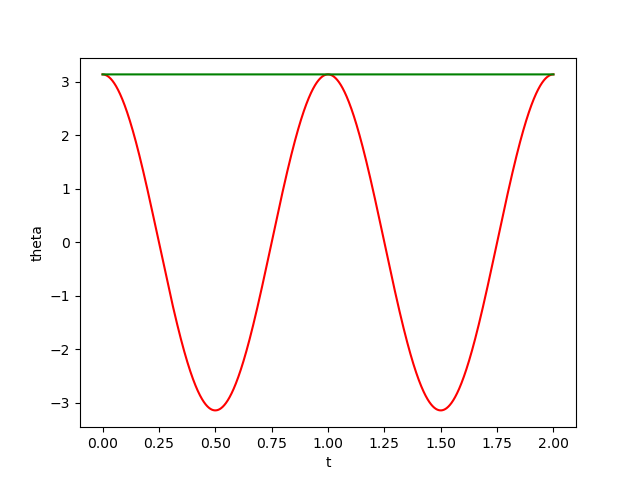

In [182]:
#given initial conditions A=pi and B=0 and L=g/(2pi)^2
A,B=np.pi,0
solution=diff_solve(A,B)
theta=solution[:,0]
theta_=A*np.cos(np.sqrt(g/L)*t)
print("For intitial angle pi, pendulum is stuck at the same constant height")
plt.figure()
plt.show()
plt.plot(t,theta_,'r')
plt.xlabel('t')
plt.ylabel('theta')
plt.plot(t,theta,'g')

$Part$ $F$

This basically means the pendulum is gainging angular speed of 0.1rad/sec, thus increasing it's motion with every angle. the graph would continue unless it's met with external force


<IPython.core.display.Javascript object>


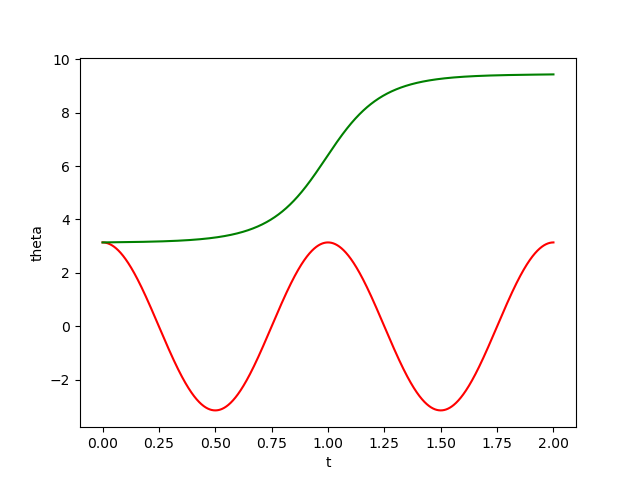

In [181]:
#given initial conditions A=pi and B=0.1 and L=g/(2pi)^2
A,B=np.pi,0.1
solution=diff_solve(A,B)
theta=solution[:,0]
theta_=A*np.cos(np.sqrt(g/L)*t)
print("This basically means the pendulum is gainging angular speed of 0.1rad/sec, thus increasing it's motion with every angle. the graph would continue unless it's met with external force") 
plt.figure()
plt.show()
plt.plot(t,theta_,'r')
plt.xlabel('t')
plt.ylabel('theta')
plt.plot(t,theta,'g')